In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
# Load the dataset
data = pd.read_csv('ecosystem_data.csv')

In [16]:
# Encode target labels
data['ecosystem_health'] = data['ecosystem_health'].map({'healthy': 0, 'at risk': 1, 'degraded': 2})

In [17]:
X = data[['water_quality', 'air_quality_index', 'biodiversity_index', 'vegetation_cover', 'soil_ph']]
y = data['ecosystem_health']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [22]:
y_pred = model.predict(X_test)
y_pred

array([2, 2, 1, ..., 2, 2, 2], dtype=int64)

In [23]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9515


In [24]:
# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Healthy', 'At Risk', 'Degraded']))

Classification Report:
              precision    recall  f1-score   support

     Healthy       0.86      0.29      0.43        21
     At Risk       0.90      0.63      0.74       222
    Degraded       0.96      1.00      0.98      1757

    accuracy                           0.95      2000
   macro avg       0.91      0.64      0.72      2000
weighted avg       0.95      0.95      0.95      2000



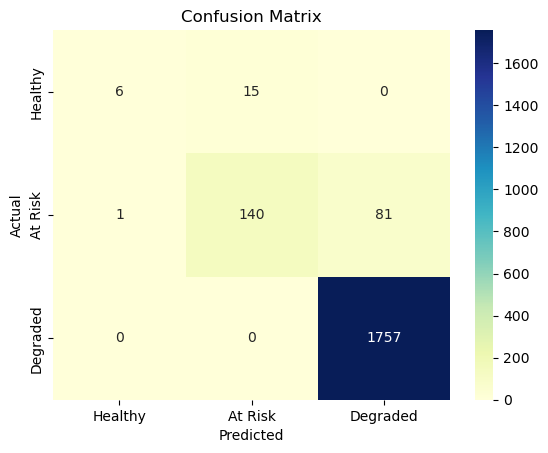

In [25]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlGnBu', 
            xticklabels=['Healthy', 'At Risk', 'Degraded'], 
            yticklabels=['Healthy', 'At Risk', 'Degraded'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()